**CS3753-Data Science Project by Fabian Aguilar Gomez**

In [ ]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#ML model imports
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore') 

**Load and Prepare data**

In [ ]:
#Load the data
data = pd.read_csv('train.csv')
#Print some rows
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#get the original shape
print('Shape of the original data (rows,columns) = ' + str(np.array(data).shape))

Shape of the original data (rows,columns) = (891, 12)


**Data pre-processing to clean**

In [ ]:
#Get empty values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#drop empty vaues
data = data.drop(["Cabin", "Name","Ticket","PassengerId"], axis=1)
data = data.dropna(subset=['Embarked', 'Age'])

In [ ]:
#check the data for no empety values
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
#Print the table after preprocesisng
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
#Get the shape of the data
print('Shape of the data (rows,columns) = ' + str(np.array(data).shape))

Shape of the data (rows,columns) = (712, 8)


**Data analysis and plots**

In [ ]:
#Summary Statistics
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Number of people that did not survive = 424
Number of people that survived = 288


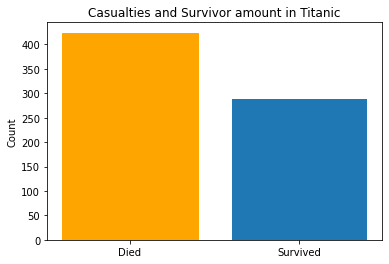

In [ ]:
#Count number of survivors and casualties
survive = data['Survived'].value_counts()
print('Number of people that did not survive = ' + str(survive[0]))
print('Number of people that survived = ' + str(survive[1]))
plt.figure()
bars = plt.bar([0,1],survive)
bars[0].set_color('orange')
plt.xticks([0,1], ['Died', 'Survived'])
plt.ylabel("Count")
plt.title("Casualties and Survivor amount in Titanic")
plt.show()

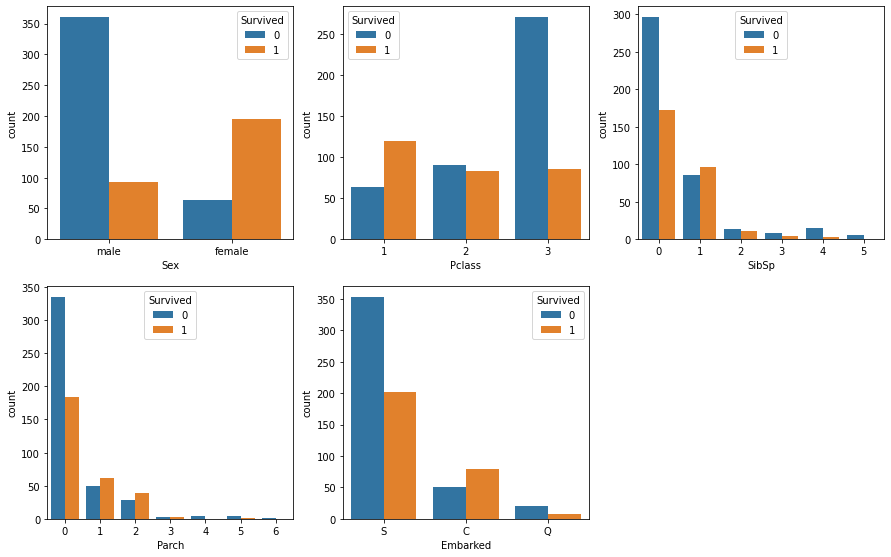

In [ ]:
#Plot of survivors for columns sex, pclass, sibsp, parch, and embarked
cols = ['Sex', 'Pclass','SibSp','Parch','Embarked']
plt.figure(figsize = (15,30))
for i in enumerate(cols):
    plt.subplot(6,3,i[0]+1)
    sns.countplot(x=i[1], hue='Survived',data=data)

In [ ]:
#Survival rate by Sex
data.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.752896
male,0.205298


In [ ]:
#Survival rate by Pclass
data.groupby('Pclass')[['Survived']].mean()

,Survived
Pclass,
1,0.652174
2,0.479769
3,0.239437


In [ ]:
#Survival rate by SibSp
data.groupby('SibSp')[['Survived']].mean()

,Survived
SibSp,
0,0.368870
1,0.530055
2,0.440000
3,0.333333
4,0.166667
5,0.000000


In [ ]:
#Survival rate by Parch
data.groupby('Parch')[['Survived']].mean()

,Survived
Parch,
0,0.354528
1,0.554545
2,0.573529
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [ ]:
#Survival rate by Embarked
data.groupby('Embarked')[['Survived']].mean()

,Survived
Embarked,
C,0.607692
Q,0.285714
S,0.362816


In [ ]:
#Survival rate by Sex and Class
data.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.963855,0.918919,0.460784
male,0.396040,0.151515,0.150198


In [ ]:
#Survival rate by Sex and Port
data.pivot_table('Survived', index='Sex', columns='Embarked')

Embarked,C,Q,S
Sex,,,
female,0.901639,0.583333,0.715054
male,0.347826,0.062500,0.184783


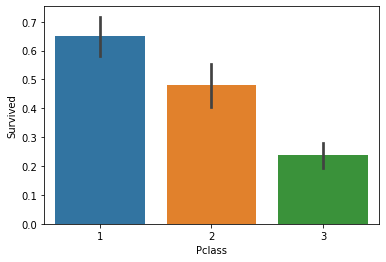

In [ ]:
#Survival rate of each class
sns.barplot(x='Pclass', y='Survived',data=data);

In [ ]:
#Survival rate by sex,age,and class
age = pd.cut(data['Age'], [0,18,80])
data.pivot_table('Survived',['Sex',age],'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972222  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

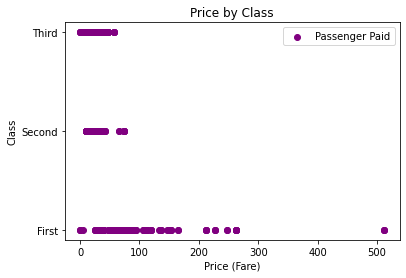

In [ ]:
#plot the prices paid by each class
plt.scatter(data['Fare'],data['Pclass'],color='purple',label='Passenger Paid')
plt.ylabel("Class")
plt.xlabel("Price (Fare)")
plt.title("Price by Class")
plt.yticks([1,2,3],['First','Second','Third'])
plt.legend()
plt.show()

          Survived       Age     SibSp     Parch      Fare
Survived  1.000000 -0.082446 -0.015523  0.095265  0.266100
Age      -0.082446  1.000000 -0.307351 -0.187896  0.093143
SibSp    -0.015523 -0.307351  1.000000  0.383338  0.139860
Parch     0.095265 -0.187896  0.383338  1.000000  0.206624
Fare      0.266100  0.093143  0.139860  0.206624  1.000000


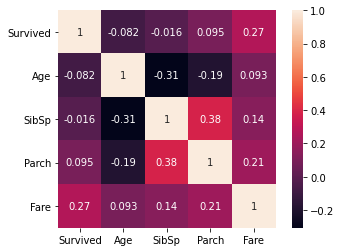

In [ ]:
#plot correlations
cols2 = ['Survived','Age','SibSp','Parch','Fare']
df_num = data[cols2]
print(df_num.corr())
sns.heatmap(df_num.corr(),annot=True,square=True);

**Prepare data for ML**

In [ ]:
#check datatypes
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [ ]:
#Unique values in columns
print(data['Sex'].unique())
print(data['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [ ]:
#Encode columns
label = LabelEncoder()
#sex column
data.iloc[:, 2] = label.fit_transform(data.iloc[:, 2].values)
#embarked column
data.iloc[:, 7] = label.fit_transform(data.iloc[:, 7].values)

In [ ]:
#Unique values in columns after encoding
print(data['Sex'].unique())
print(data['Embarked'].unique())

[1 0]
[2 0 1]


In [ ]:
#check data types after encoding
data.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

In [ ]:
#Final dataframe used in ML
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


**Create ML models and train them with training data and target**

In [ ]:
#Split the data into independent 'X' & dependent 'Y' variables
x = data.iloc[:, 1:8].values
#target data
y = data.iloc[:, 0].values

In [ ]:
#Get our test data from the training data
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=0.2, random_state=0)

In [ ]:
#Create function with ML models
def models(xTrain, yTrain):
    #logisitic regression
    log = LogisticRegression(random_state=0)
    log.fit(xTrain,yTrain)

    #Kneighbors
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    knn.fit(xTrain,yTrain)

    #SVC linear kernel
    svc_linear = SVC(kernel='linear', random_state=0)
    svc_linear.fit(xTrain,yTrain)

    #SVC RBF kernel
    svc_rbf = SVC(kernel='rbf', random_state=0)
    svc_rbf.fit(xTrain,yTrain)

    #GaussianNB
    gauss = GaussianNB()
    gauss.fit(xTrain,yTrain)

    #Decision Tree
    tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
    tree.fit(xTrain,yTrain)

    #Random Forest Classifier
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    forest.fit(xTrain,yTrain)

    #Print accuracy of each model
    print('Logisitic Regression Training Accuracy: ', log.score(xTrain,yTrain))
    print('K Neighbors Training Accuracy: ', knn.score(xTrain,yTrain))
    print('SVC linear Training Accuracy: ', svc_linear.score(xTrain,yTrain))
    print('SVC RBF Training Accuracy: ', svc_rbf.score(xTrain,yTrain))
    print('Gaussian NB Training Accuracy: ', gauss.score(xTrain,yTrain))
    print('Decision Tree Training Accuracy: ', tree.score(xTrain,yTrain))
    print('Random Forest Training Accuracy: ', forest.score(xTrain,yTrain))

    return log,knn,svc_linear,svc_rbf,gauss,tree,forest

In [ ]:
#Train the models
model = models(xTrain, yTrain)

Logisitic Regression Training Accuracy:  0.8031634446397188
K Neighbors Training Accuracy:  0.789103690685413
SVC linear Training Accuracy:  0.7768014059753954
SVC RBF Training Accuracy:  0.6854130052724078
Gaussian NB Training Accuracy:  0.8031634446397188
Decision Tree Training Accuracy:  0.9929701230228472
Random Forest Training Accuracy:  0.9753954305799648


In [ ]:
#Confusion matrix & accuracy for models in test data
modelNames = ['Logistic Regression' , 'K Neighbors', 'SVC Linear', 'SVC RBF', 
              'Gaussian NB', 'Decision Tree', 'Random Forest']
for i in range(len(model)):
    matrix  = confusion_matrix(yTest,model[i].predict(xTest))

    #Get the true negative, false positive, false negative, & true positive
    TN, FP, FN, TP = confusion_matrix(yTest,model[i].predict(xTest)).ravel()

    #Accuracy
    acc = (TP + TN) / (TP + TN + FN + FP)

    #Print the info
    print(matrix)
    print('{} Testing Accuracy = {}'.format(modelNames[i],acc))
    print()

[[74  8]
 [18 43]]
Logistic Regression Testing Accuracy = 0.8181818181818182

[[64 18]
 [30 31]]
K Neighbors Testing Accuracy = 0.6643356643356644

[[70 12]
 [18 43]]
SVC Linear Testing Accuracy = 0.7902097902097902

[[75  7]
 [45 16]]
SVC RBF Testing Accuracy = 0.6363636363636364

[[69 13]
 [23 38]]
Gaussian NB Testing Accuracy = 0.7482517482517482

[[60 22]
 [10 51]]
Decision Tree Testing Accuracy = 0.7762237762237763

[[67 15]
 [13 48]]
Random Forest Testing Accuracy = 0.8041958041958042



In [ ]:
#Get priority of features
forest = model[6]
priorities = pd.DataFrame({'Feature':data.iloc[:, 1:8].columns, 'Priority': np.round(forest.feature_importances_,3)})
priorities = priorities.sort_values('Priority', ascending=False).set_index('Feature')
priorities

,Priority
Feature,
Age,0.300
Fare,0.296
Sex,0.183
Pclass,0.098
SibSp,0.050
Parch,0.044
Embarked,0.030


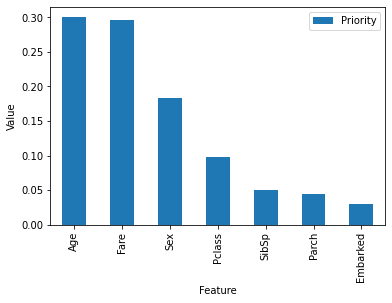

In [ ]:
#plot the features
priorities.plot.bar()
plt.ylabel("Value");

**ML model of choice results**

In [ ]:
#Predict using Random Forest Classifier
pred = model[6].predict(xTest)
print(pred)
print()
#Print raw values
print(yTest)

[1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [ ]:
#Test the test file
test = pd.read_csv('test.csv')
#Drop same columns
test = test.drop(["Cabin", "Name","Ticket","PassengerId"], axis=1)

In [ ]:
#Check for Nanvalues
test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [ ]:
#Drop na values
test = test.dropna(subset=['Age','Fare'])
#Encode columns
#sex column
test.iloc[:, 1] = label.fit_transform(test.iloc[:, 1].values)
#embarked column
test.iloc[:, 6] = label.fit_transform(test.iloc[:, 6].values)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [ ]:
#Convert to numpy array
testArray = np.array(test)
#Create empty array to store survival
Survival = []
#Test the survival of each person
for person in testArray:
    person = person.reshape(1,-1)
    pred = model[6].predict(person)
    Survival.append(pred[0])

In [ ]:
#Read the data again and add the surival column
testResult = pd.read_csv('test.csv')
testResult = testResult.dropna(subset=['Age','Fare'])
testResult['Survived'] = Survival

In [ ]:
#print a couple rows from the new table
testResult.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


**Custom test**

In [ ]:
#Test my own survival
mySurival = [[1,0,16,0,0,100,2]]

#Print my prediction using Random Forest Classifier
pred = model[6].predict(mySurival)
print("My prediction: " + str(pred[0]))

if pred[0] == 0:
    print("I did not survive!")
else:
    print("I survived the Titanic!")

My prediction: 1
I survived the Titanic!
